# Arrays
Numpy is a python library that allows to manipulate arrays. An array in programming is a sequence of contiguous cells in memory that can store elements of the same type. With respect to lists, in which elements are not contiguous, they allow a fast access to the elements when the array is scanned in order.
I can also define multidimensional arrays. For example, assume that I want to create a 3 dimensional array __v__ with shape (2,3,4). The shape of an array tells me the number of elements for each dimension of the array. Let us analyze what does it mean with the previous example:

__v__ has two elements in the first dimension, 3 elements in the second dimension and 4 elements in the fourth dimension meaning that each element of __v__, `v[i]` is another array with two dimensions, and each element of the second array, `v[i,j]` is another array of 4 elements.

The picture shows how the array is stored in memory:
<p align=center>
<img src=../imgs/02_md_array.png width=25%>
</p>


## Indexing

In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
# initialize a new array and fill it with ones
a = np.ones(shape=(2,3,4),dtype=np.int32)
a.shape

(2, 3, 4)

In [22]:
# i can also initialize an array from a Python list
v = np.asarray([
            [[111,112,113,114],[121,122,123,124],[131,132,133,134]],
            [[211,212,213,214],[221,222,223,224],[231,232,233,234]]],dtype=np.int32)
print((v.shape,v.dtype))
v

((2, 3, 4), dtype('int32'))


array([[[111, 112, 113, 114],
        [121, 122, 123, 124],
        [131, 132, 133, 134]],

       [[211, 212, 213, 214],
        [221, 222, 223, 224],
        [231, 232, 233, 234]]], dtype=int32)

In [23]:
# you can access the elements of an array through indexes, for example if i want
# to access the element in the first position in the first dimension, in the third
# position in the second dimension and in the fourth position in the third dimension
# i can write (remember that indexes start from zero)
v[0,2,3]

134

In [24]:
# if I only specify the first indices i get the multidimensional array addressed
# by that index (see the figure above)
v[1]

array([[211, 212, 213, 214],
       [221, 222, 223, 224],
       [231, 232, 233, 234]], dtype=int32)

In [25]:
# now assume I want to get all the elements where the index in the second dimension is 2.
# To do this I need to use the slice notation, I can index a dimension either using an index
# or using a slice, i.e by specifying start:stop:step, where step is optional. If I do not 
# specify the start and stop the default values are the first and last index in the dimension
v[:,2,:]


array([[131, 132, 133, 134],
       [231, 232, 233, 234]], dtype=int32)

In [26]:
# Now I want all the elements with an odd position in the second dimension and even position in the
# fourth dimension
v[:,1::2,::2]

array([[[121, 123]],

       [[221, 223]]], dtype=int32)

## Operations with arrays
In numpy I can make operations between arrays with the same shape. The operation is then applied elementwise

In [27]:
a = np.asarray([[1,2,3],[4,5,6]])
b = np.asarray([[1,1,1],[2,2,2]])

In [28]:
a + b

array([[2, 3, 4],
       [6, 7, 8]])

Numpy also implements the matrix product (rows by columns). It can be called explicitly with `np.matmul` or with 
the operator `@`. Note that the matrix product works if the two matrix have compatible shapes (the number of columns
 of the first is equal to the number of rows of the second).
$$
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{pmatrix}
\begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix} = 
\begin{pmatrix}
a_{11}b_1 + a_{12}b_2 + a_{13}b_3 \\
a_{21}b_1 + a_{22}b_2 + a_{23}b_3
\end{pmatrix}
$$

In [29]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
b = np.asarray([1,2,3])
a @ b

array([14, 32])

## Broadcasting
What if the operands have different shapes? In some special cases we can still make operations between arrays with different shapes using a mechanism that is called Broadcasting.
In particular, the shapes of the two arrays are compared element-wise starting from the right, the dimensions are compatible when the elements: 
1) are equal
2) one of them is 1

Then when a dimension in one array is 1 and in the other is greater then 1, say it is d, the array with dimension 1 is copied d times along that dimension to match the other array.
Here is a graphical example taken from the [numpy documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).
<p align=center>
<img src=../imgs/broadcasting_4.png width=30%>
</p>
Note that the two arrays do not need to have the same number of dimensions, when a dimension in missing it is considered 1.

We can use broadcasting in many real life scenarios. For example assume that I need to plot a 2D function over a grid, for example:
$$
f(x,y) = x^2 + y^2 + 2y
$$
Let see the implementation with and without broadcasting.

In [31]:
def foo(x,y):
    return x**2 + y**2 +2*y

In [32]:
# x and y contain respectively the
# values of the x and y coordinates
x = np.arange(-1,1,10**-2)
y = np.arange(-1,1,10**-2)

### Solution without broadcasting

In [33]:
# i need to evaluate the function over a grid with 200 x 200 elements
# where the element [i,j] contains the values of the coordinates x[i],y[j]
Z = np.zeros((200,200))
for i in range(200):
    for j in range(200):
        Z[i,j] = foo(x[i],y[j])
Z.shape

(200, 200)

moreover the plotting function [ax.plot_surface(X,Y,Z)](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) requires three argument
  - Z: the grid with the value of the function
  - X and Y: two arrays with the same shape as Z with respectively the x and 
    y coordinates of the values in Z

So I need to duplicate X along the second dimension for each value of y and 
y along the first dimension for each value of x. 

In [34]:
# given a vector a i can add a dimension with value 1 as follows:
print(x.shape)
X = x[:,None]
print(X.shape)

(200,)
(200, 1)


In [35]:
Y = y[None,:]
Y.shape

(1, 200)

In [36]:
# repeat X 100 times along the second dimension
X = np.repeat(X,repeats=200,axis=1)
x.shape

(200,)

In [37]:
# repeat Y 100 times along the first dimension
Y = np.repeat(Y,repeats=200,axis=0)
Y.shape

(200, 200)

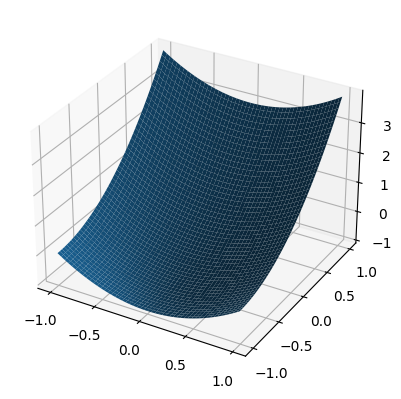

In [38]:
fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,Z)
plt.show()

### Solution with Broadcasting

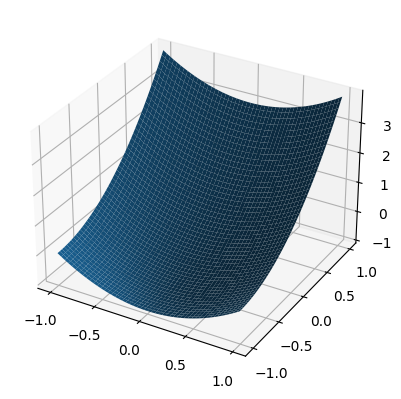

In [39]:
Z = foo(x[:,None],y[None,:])
fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(np.repeat(x[:,None],200,1),np.repeat(y[None,:],200,0),Z)
plt.show()